In [2]:
%pip install pandas 
%pip install numpy
%pip install matplotlib
%pip install seaborn
%pip install scikit-learn


[notice] A new release of pip is available: 23.3.2 -> 24.0
[notice] To update, run: python.exe -m pip install --upgrade pip


Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 23.3.2 -> 24.0
[notice] To update, run: python.exe -m pip install --upgrade pip


Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 23.3.2 -> 24.0
[notice] To update, run: python.exe -m pip install --upgrade pip



[notice] A new release of pip is available: 23.3.2 -> 24.0
[notice] To update, run: python.exe -m pip install --upgrade pip



Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 23.3.2 -> 24.0
[notice] To update, run: python.exe -m pip install --upgrade pip


In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn

C:\Users\Admin\AppData\Local\Temp\ipykernel_13944\1045015467.py:1: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


In [4]:
%pip install ucimlrepo

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 23.3.2 -> 24.0
[notice] To update, run: python.exe -m pip install --upgrade pip


In [5]:
from ucimlrepo import fetch_ucirepo 
  
# fetch dataset 
heart_disease = fetch_ucirepo(id=45) 
  
# data (as pandas dataframes) 
df = heart_disease.data.features 
df_results = heart_disease.data.targets 
  
# metadata 
print(heart_disease.metadata) 
  
# variable information 
print(heart_disease.variables) 


{'uci_id': 45, 'name': 'Heart Disease', 'repository_url': 'https://archive.ics.uci.edu/dataset/45/heart+disease', 'data_url': 'https://archive.ics.uci.edu/static/public/45/data.csv', 'abstract': '4 databases: Cleveland, Hungary, Switzerland, and the VA Long Beach', 'area': 'Health and Medicine', 'tasks': ['Classification'], 'characteristics': ['Multivariate'], 'num_instances': 303, 'num_features': 13, 'feature_types': ['Categorical', 'Integer', 'Real'], 'demographics': ['Age', 'Sex'], 'target_col': ['num'], 'index_col': None, 'has_missing_values': 'yes', 'missing_values_symbol': 'NaN', 'year_of_dataset_creation': 1989, 'last_updated': 'Fri Nov 03 2023', 'dataset_doi': '10.24432/C52P4X', 'creators': ['Andras Janosi', 'William Steinbrunn', 'Matthias Pfisterer', 'Robert Detrano'], 'intro_paper': {'title': 'International application of a new probability algorithm for the diagnosis of coronary artery disease.', 'authors': 'R. Detrano, A. Jánosi, W. Steinbrunn, M. Pfisterer, J. Schmid, S. Sa

1. Clean your dataset to turn categorical values into numerical ones. One-hot encoding is likely the answer, but it depends on the dataset. Your data may have ordinal columns, for example where one-hot encoding is not as appropriate. 

In [8]:
df.dtypes

age           int64
sex           int64
cp            int64
trestbps      int64
chol          int64
fbs           int64
restecg       int64
thalach       int64
exang         int64
oldpeak     float64
slope         int64
ca          float64
thal        float64
dtype: object

This step was already done, from the metadata we can see that thal,slope,exang,restecg,fbs,cp, & sex  are all categorical but have been turned into discrete int or float as preprocessing.

I can deal with null values for the non categorical columns though

{'whiskers': [<matplotlib.lines.Line2D at 0x25ce4d25d00>,
 'caps': [<matplotlib.lines.Line2D at 0x25ce4d44280>,
 'boxes': [<matplotlib.lines.Line2D at 0x25ce4d25a60>],
 'medians': [<matplotlib.lines.Line2D at 0x25ce4d447c0>],
 'fliers': [<matplotlib.lines.Line2D at 0x25ce4d44a60>],
 'means': []}

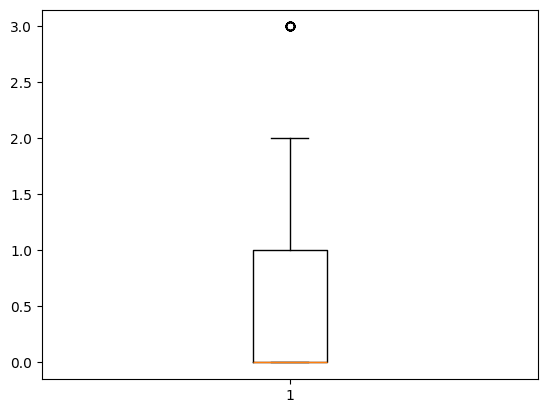

In [15]:
plt.boxplot(df['ca'].dropna())

Large skew so we use median

In [50]:
df['num'] = df_results['num']

In [71]:
df['ca'] = df['ca'].fillna(df['ca'].dropna().median())

The only other column missing values is 'thal' which is a categorical one. We can either drop the null values, or replace them with mode(thins wouldn't be the best, but is the best I can think of without a clustering ML algorithm)

After checking, there are only 2 null values, I am just going to drop them

In [84]:
df['thal'] = df['thal'].dropna()

2. Perform univariate linear regression on the dataset. Select your variable to predict. How well did this model perform? Is this a good approach for this dataset? Why or why not? 

In [41]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

X = np.array(df['ca']).reshape(-1,1)

y = np.array(df['num']).reshape(-1,1)

X_train,X_test,y_train,y_test = train_test_split(X,
                                                 y,
                                                 test_size = 0.25,
                                                 random_state = 14)

regression1 = LinearRegression()
regression1.fit(X_train,y_train)

LinearRegression()

In [1]:
pred1 = regression1.predict(X_test)

NameError: name 'regression1' is not defined

In [46]:
accuracy1 = regression1.score(X_test,y_test)
print(accuracy1)

0.37641436899776426


In [47]:
from sklearn.metrics import r2_score

r2_score(y_test,pred1)

0.37641436899776426

This model has an accuracy score of 36.7% which is quite bad, Though there could be some tweaking with which feature is used as the basis for the predictions, this approach inherently is not a good one.

univariate linear regression is not a very useful tehcnique, inherently it can only produce a linear model which doesn't work for many dataset(though this is true for all linear regression algorithms). Also, by only taking into account one variable, the model will likely have an accuracy close to the correlation value between the two values, which you don't need a ML algorith to find.

3. Perform KNN on this dataset. As part of this, write a function that selects the optimal value of k. How well did this model perform?

In [1]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split


def neighbors_finder(DATAFRAME,COLUMN):
    """This finds the optimal number of neighbors, you do have to sort throught the list yourself, but that is fine"""
    X = DATAFRAME.drop(COLUMN,axis=1)
    y = DATAFRAME[COLUMN]

    X_train,X_test,y_train,y_test = train_test_split(X,
                                                     y,
                                                     test_size = 0.25,
                                                     random_state=15)
    neighbors = []
    k = 1
    while k < 30:
        knn = KNeighborsClassifier(n_neighbors=k)
        knn.fit(X_train,y_train)
        neighbors.append(knn.score(X_test,y_test))
        k+=2

    return neighbors

neighbors_finder(df,'num')

NameError: name 'pd' is not defined

This model did better than the univariate linear regression model, though it still is barrely better than 50% with 7-9 neighbors. Interestingly after 9 neighbors, increasing it doesn't do anything

4. Work with your dataset to perform logistic regression. How well did this perform?

While it is possible to use logistic regression on a multi-class(non-binary) problem, I do not know how to do that(from searching it is the one vs. all method?). So to deal with this I am making the outcomes of this data a binary, with 1-4 being positive & 0 as negative. This introduces issues as we do not know the severity of the heart disease, but if it is more accurate than the other models, it is better than a false negative.

Convergance issue

Cause?: the input data has to little variance

In [123]:
log_fixing = lambda x: 1 if x>0 else 0

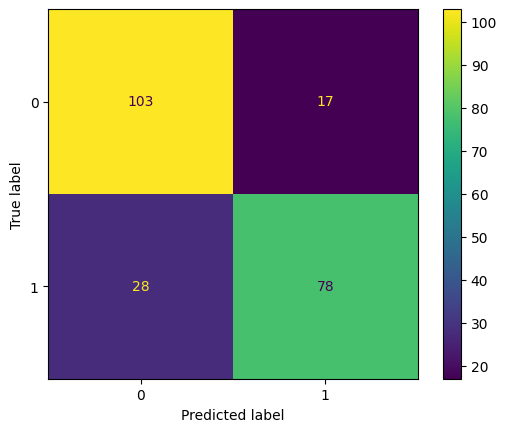

In [140]:
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay

def logisticregression(DATAFRAME,COLUMN):
    """Logistic regression code, plus some scaling"""

    y = DATAFRAME[COLUMN].apply(log_fixing)
    X = DATAFRAME.drop(COLUMN,axis=1)




    X_train,X_test,y_train,y_test = train_test_split(X,
                                                    y,
                                                    train_size=0.25,
                                                    random_state=15)

    #This just standardizes the data

    sc = StandardScaler() 
    X_train = sc.fit_transform(X_train) 
    X_test = sc.fit_transform(X_test)

    LogRegression = LogisticRegression(random_state=16).fit(X_train,y_train)

    return ConfusionMatrixDisplay.from_estimator(LogRegression,X_test,y_test)

logisticregression(df,'num')


recall: 103/(103+28) = 78.6259542%

5. Perform normalization on your dataset. Does it change the performance for 2-4? What is the best measure of performance for your dataset (accuracy or something else) and why?

In [139]:
X = np.array(df['ca']).reshape(-1,1)

y = np.array(df['num']).reshape(-1,1)



X_train,X_test,y_train,y_test = train_test_split(X,
                                                 y,
                                                 test_size = 0.25,
                                                 random_state = 14)

sc = StandardScaler() 
X_train = sc.fit_transform(X_train) 
X_test = sc.fit_transform(X_test)

regression1 = LinearRegression()
regression1.fit(X_train,y_train)

accuracy1 = regression1.score(X_test,y_test)
print(accuracy1)

0.2712243206883004


Interestingly the accuracy score lowered, I'm not sure why this is. I can say though that the precision probably increased as the data has less variation.

Accuracy is a better metric of model performance than precision for linear regression models. Since linear regression models create a line that is in essence an average of the data points, being consistantly wrong isn't very useful. 

Accuray, even if it can't tell us much about a particular datum, can tell us trends. And linear regression models are generally used to determine trends(?).

In [142]:
def neighbors_finder(DATAFRAME,PREDICTION):
    """This finds the optimal number of neighbors, you do have to sort throught the list yourself"""
    X = DATAFRAME.drop(PREDICTION,axis=1)
    y = DATAFRAME[PREDICTION]

    X_train,X_test,y_train,y_test = train_test_split(X,
                                                     y,
                                                     test_size = 0.25,
                                                     random_state=15)
    neighbors = []
    k = 1
    while k < 30:
        sc = StandardScaler() 
        X_train = sc.fit_transform(X_train) 
        X_test = sc.fit_transform(X_test)
        knn = KNeighborsClassifier(n_neighbors=k)
        knn.fit(X_train,y_train)
        neighbors.append(knn.score(X_test,y_test))
        k+=2

    return neighbors

neighbors_finder(df,'num')


[0.42105263157894735,
 0.5394736842105263,
 0.5394736842105263,
 0.5394736842105263,
 0.5657894736842105,
 0.5789473684210527,
 0.5526315789473685,
 0.5131578947368421,
 0.5394736842105263,
 0.5657894736842105,
 0.5657894736842105,
 0.5657894736842105,
 0.5789473684210527,
 0.5657894736842105,
 0.5789473684210527]

Scaling the data in this case increased the accuracy(.score is accuracy) by ~6% compared to the previous model (~3 total). 

for KNN ML, I don't know how you could have low precision. Since the model is choosing the outcome based on the 'distance' of the value that is going to be predicted & the other values(my understanding). So assuming the model considers all 'features' equally, shouldn't it have perfect precision? Or is there variance in the calculation that allows for different amounts of precision?

I think accucracy vs precision might depend on the application of the model(?). Accuracy is better if the model is predicting trends, whereas precision is better when each individual prediction is valuble(?).

Though, given that KNN is a discrete predictition, precision might be more valueble as biases are compounded in discrete prediction (51% in one direction turns into a 100%). So low precision would lead to accuracy.

In [2]:
#LogisticRegression

I ran into a convergance issue with the LogisticRegression model without using standard scalar. I don't know how this works as the standard scalar lowers the diversity of values, while convergense issues occurs when values are to close.

I believe that something resembling a recall score would be best for a logistic regression model. As I said above, by making a binary prediction, bias in one direction will only be compounded. Why I chose recall over precision is the inclusion of flase negatives into the calculationa they are more detremental than false positives.